In [176]:
import torchvision
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pandas as pd
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from maderapp.data.data import MaderappDataset

In [177]:
metadata = pd.DataFrame({
    "x1": ["Almendro/Almendro (1).jpg", "Almendro/Almendro (9).jpg"]*4,
    "x2": [0,0]*4
})

In [178]:
class_names = sorted(metadata.iloc[:, 1].value_counts().index)
class_names2ids = {j: i for i, j in enumerate(class_names)}
class_ids2names = {j: i for i, j in class_names2ids.items()}

In [179]:
train_trans = A.Compose(
        [
            A.Resize(224, 224),
            A.RandomCrop(width=224, height=224),
            A.augmentations.geometric.rotate.Rotate(),
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.5),
            A.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            ToTensorV2(),
        ]
    )

In [180]:
training_data = MaderappDataset(img_dir="../data", annotations_file=metadata, 
                    class_names2ids=class_names2ids, 
                    transform=train_trans)
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)

In [181]:
images = next(iter(train_dataloader))
train_features, train_labels = images
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([8, 3, 224, 224])
Labels batch shape: torch.Size([8])


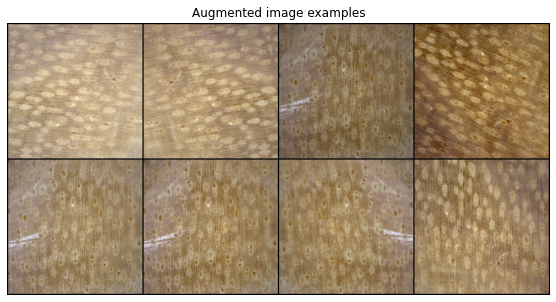

In [183]:
grid = torchvision.utils.make_grid(train_features, nrow=4, normalize=True)
grid = grid.permute(1, 2, 0)

plt.figure(figsize=(10,5))
plt.title('Augmented image examples')
plt.imshow(grid)
plt.axis('off')
plt.show()
plt.close()